<a href="https://colab.research.google.com/github/Nrg123456/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Import Libraries`***

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# ***`Load Dataset`***

In [28]:
df = pd.read_csv("/bank-full.csv", sep=';')

# ***`Preprocess Data`***

In [20]:
# Convert target column 'y' to binary (yes=1, no=0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Save feature names for prediction
feature_names = X.columns.tolist()


# ***`Train/Test Split & Train Model`***

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# ***`Evaluate the Model`***

In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8973791883224593
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



# ***`Visualize the Tree (Top 3 Levels)`***

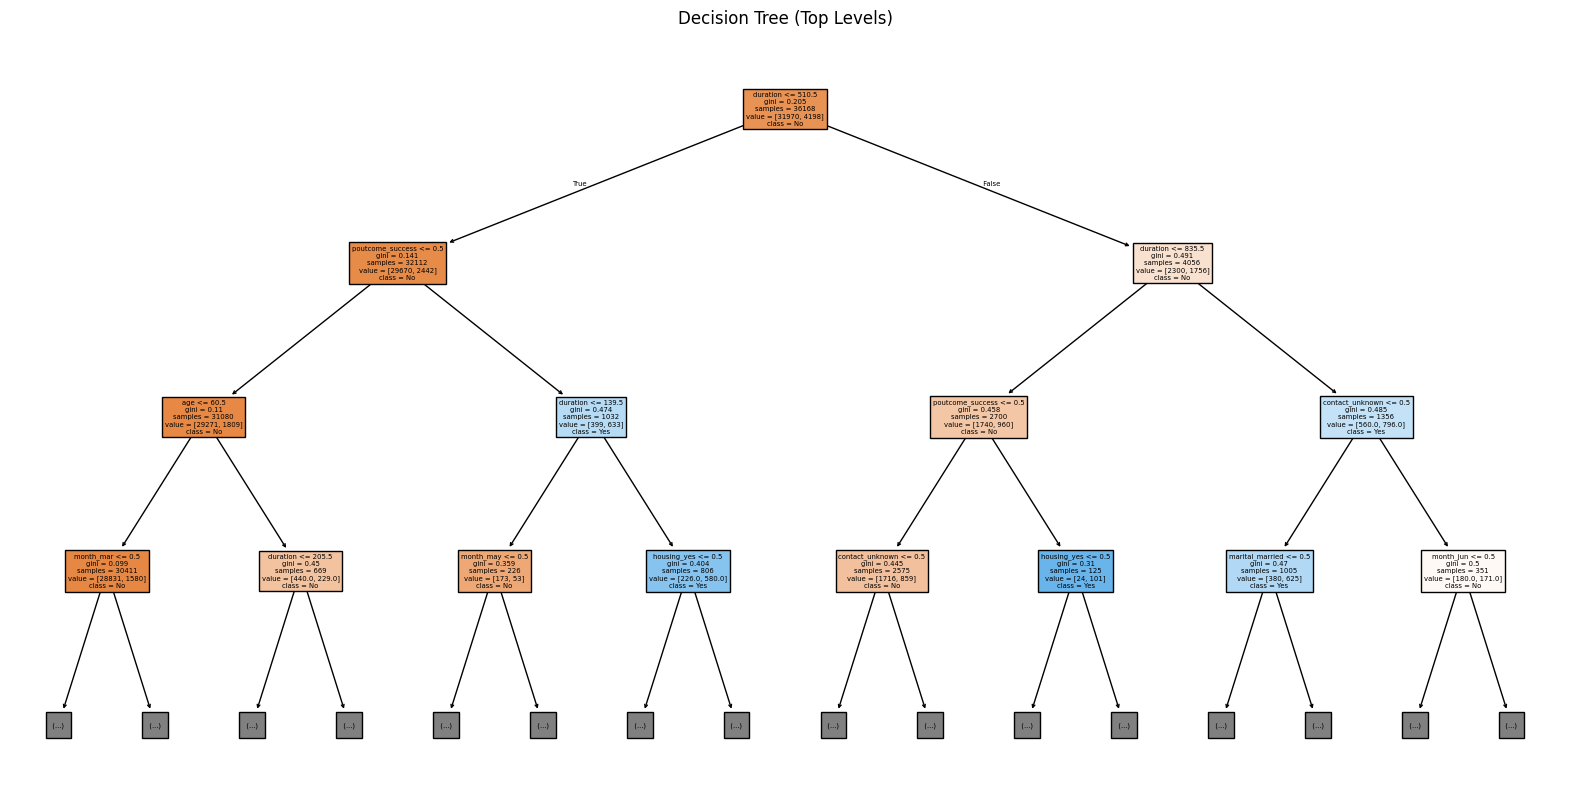

In [23]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, max_depth=3)
plt.title("Decision Tree (Top Levels)")
plt.show()

# ***`Feature Importance Plot`***

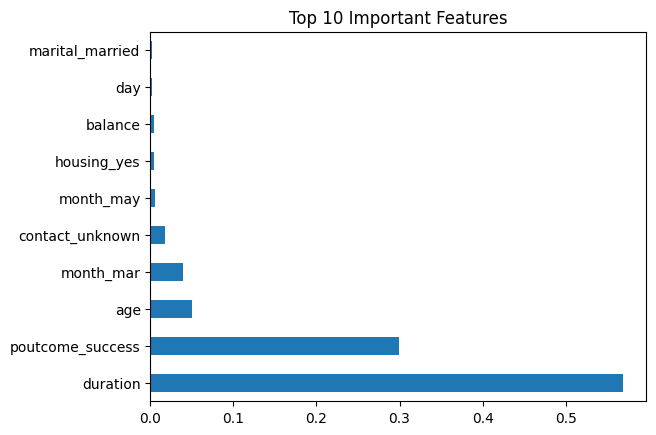

In [24]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# ***`Predict on New Customer`***

In [25]:
def prepare_input(raw_data_dict, feature_names):
    input_df = pd.DataFrame([raw_data_dict])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=feature_names, fill_value=0)
    return input_df

In [26]:
new_customer = {
    'age': 45,
    'job': 'technician',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 1200,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 15,
    'month': 'aug',
    'duration': 210,
    'campaign': 2,
    'pdays': 999,
    'previous': 0,
    'poutcome': 'unknown'
}

In [27]:
# Prepare input
input_df = prepare_input(new_customer, feature_names)

# Predict
prediction = model.predict(input_df)
proba = model.predict_proba(input_df)

print("Will the customer buy?", "Yes" if prediction[0] == 1 else "No")
print(f"Probability of purchase: {proba[0][1]:.2f}")

Will the customer buy? No
Probability of purchase: 0.10
